<a href="https://colab.research.google.com/github/benyanko/DeepLearningAndAI/blob/main/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion Classification using CNN**
Take an input image (28x28 pixels) of a fashion item and classify fashion images and categories.


In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools

# Load Data

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # data returns two tuple 
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalize values ​​in the range of 0 to 1 

print("x_train shape: ", x_train.shape) 

x_train shape:  (60000, 28, 28)


In [4]:
# Data is only 2D
# Convolution expects height x width x color

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
# Number of classes

K = len(set(y_train))
print("Number of classesL ", K)

Number of classesL  10


# Build The Model
Build the model using the functional API

In [7]:
# Conv2D layer -
# (Dimensionality of the output space,
# Filter dimensions,
# Strides determines how much the filter window shifts by in each of the dimensions - The image dimensions get reduce by half after each conv
# Activation func = ReLU - f(x)=max(0,x))

#Flatten layer - convert the image to a feature vector

# Dropout layer - randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

# Dense layer with 512 units (hyperparameter selection) - dimensionality of the output space, activation ReLU - f(x)=max(0,x).

# Dense layer with K units for our K clasess, activation 'Softmax' - output is therefore a probability distribution (maps our output to a [0,1] range).


i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# Compile The Model

In [8]:
# Compile defines the loss function, the optimizer and the metrics.
# Adam optimization is a stochastic gradient descent method.
# Cost func is sparse_categorical_crossentropy because we expect labels to be provided as integers
# Metric functions is accuracy which calculates how often predictions equal labels

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train The Model

In [9]:
# Train data - x_train, y_train
# Validation data - x_test, y_test
# epochs=15 - "one pass over the entire dataset", used to separate training into distinct phases

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.6992 - accuracy: 0.7444 - val_loss: 0.4164 - val_accuracy: 0.8445
Epoch 2/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3801 - accuracy: 0.8593 - val_loss: 0.3539 - val_accuracy: 0.8678
Epoch 3/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3239 - accuracy: 0.8788 - val_loss: 0.3295 - val_accuracy: 0.8802
Epoch 4/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2801 - accuracy: 0.8928 - val_loss: 0.3071 - val_accuracy: 0.8892
Epoch 5/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2514 - accuracy: 0.9042 - val_loss: 0.2970 - val_accuracy: 0.8938
Epoch 6/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2280 - accuracy: 0.9138 - val_loss: 0.3079 - val_accuracy: 0.8912
Epoch 7/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2088 - accuracy: 0.9215 - val_loss: 0.2970 -

#Plots

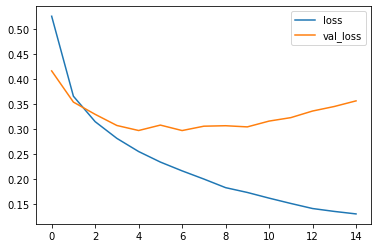

In [10]:
# Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

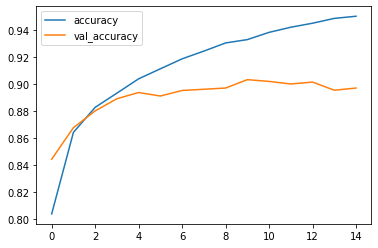

In [11]:
#plot accuracy per iteration

plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion Matrix, without Normalization
[[800   2  22  22   4   1 145   0   4   0]
 [  4 977   1  11   3   0   2   0   2   0]
 [ 18   0 861   9  46   0  66   0   0   0]
 [ 11   7  20 915  23   1  19   0   3   1]
 [  1   0  77  30 837   0  55   0   0   0]
 [  0   0   0   0   0 970   0  16   0  14]
 [ 67   1  76  27  99   0 722   0   8   0]
 [  0   0   0   0   0  18   0 968   0  14]
 [  5   2   7   2   5   2  10   2 964   1]
 [  1   0   0   0   0   4   0  38   0 957]]


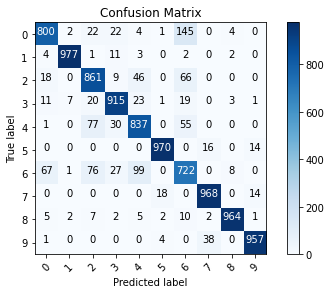

In [17]:
# Plot confusion matrix

# This function prints and plots the confusion matrix.
# Normalization can be applied by setting 'normalize=True'.

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print ("Normalizrd Confusion Matrix")
  else:
        print ("Confusion Matrix, without Normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [18]:
#Label Mapping

labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

It can be seen that the results make sense.
The pairs that are easy to confuse are indeed fashion item whose visibility is very similar.
For example:
```
T-shirt/top <--> shirt
coat <--> shirt
```





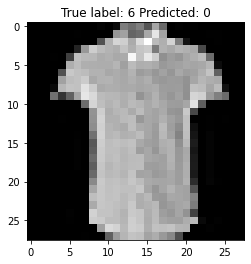

In [22]:
# Show some misclassified examples

misclassified_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_index)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));